## SuperMario Frames Preprocessing

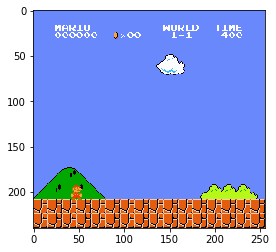

image of size 240x256


In [4]:
import gym_super_mario_bros as gym
import matplotlib.pyplot as plt

env = gym.make('SuperMarioBros-v0')
state = env.reset()
plt.imshow(state)
plt.show()
print(f'image of size {state.shape[0]}x{state.shape[1]}')

The idea is to highlight Mario, cut the top part of the frame and make background darker

<class 'numpy.ndarray'>


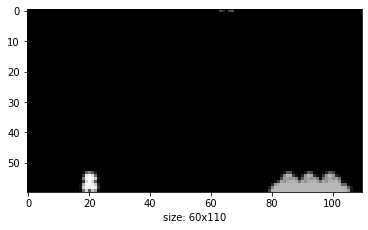

In [5]:
import torchvision
from supermario_dqn.preprocess import *
from torchvision import transforms
import numpy as np

state_ = preprocess(state)
print(type(state))
plt.imshow(state_, cmap='gray')
plt.xlabel(f'size: {state_.shape[0]}x{state_.shape[1]}')
plt.show()

Neural Network will be feed with a 3x60x110 frame containing 3 frames

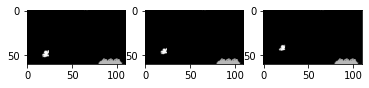

In [33]:
from collections import deque
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace 

env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

env.reset()
action = 2

# init
for i in range(4):
    env.step(action)[0]
    
for i in range(3):
    state = None
    for j in range(2):
        state = env.step(action)[0]
        
    plt.subplot(1, 3, i+1)
    plt.imshow(preprocess(frames[i]), cmap='gray')
    
plt.show()